In [1]:
from tree import Mbtree

mbtree = Mbtree()
print(mbtree.nodelist.index(mbtree.root))

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946
0


In [2]:
print(mbtree.nodelist.index(mbtree.nodelist[-1]))

549945


In [3]:
%%timeit
mbtree.nodelist.index(mbtree.root)

45.8 ns ± 0.264 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [4]:
%%timeit
mbtree.nodelist.index(mbtree.nodelist[-1])

30.5 ms ± 752 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
from copy import deepcopy
from marubatsu import Marubatsu_GUI
import matplotlib.pyplot as plt
from tree import Rect

class Node:
    # ノードを作成した回数を表すクラス属性
    count = 0
    
    def __init__(self, mb, parent=None, depth=0):
        self.id = Node.count
        Node.count += 1
        self.mb = mb
        self.parent = parent
        self.depth = depth
        self.children = []
        self.children_by_move = {}        
        
    def insert(self, node):
        self.children.append(node)
        self.children_by_move[node.mb.last_move] = node
        
    def calc_children(self):
        self.children = []
        for x, y in self.mb.calc_legal_moves():
            childmb = deepcopy(self.mb)
            childmb.move(x, y)
            self.insert(Node(childmb, parent=self, depth=self.depth + 1))
        
    def calc_height(self):
        if len(self.children) == 0:
            self.height = 4
        else:
            self.height = 0
            for childnode in self.children:
                self.height += childnode.height

    def draw_node(self, ax=None, maxdepth=None, emphasize=False, size=0.25, lw=0.8, dx=0, dy=0):
        width = 8
        if ax is None:
            height = len(self.children) * 4
            fig, ax = plt.subplots(figsize=(width * size, height * size))
            ax.set_xlim(0, width)
            ax.set_ylim(0, height)   
            ax.invert_yaxis()
            ax.axis("off")
            for childnode in self.children:
                childnode.height = 4
            self.height = height
                
        # 自分自身のノードを真ん中の位置になるように (dx, dy) からずらして描画する
        y = dy + (self.height - 3) / 2
        Marubatsu_GUI.draw_board(ax, self.mb, show_result=True, emphasize=emphasize, lw=lw, dx=dx, dy=y)
        rect = Rect(dx, y, 3, 3)
        # 子ノードが存在する場合に、エッジの線と子ノードを描画する
        if len(self.children) > 0:
            if maxdepth != self.depth:   
                plt.plot([dx + 3.5, dx + 4], [y + 1.5, y + 1.5], c="k", lw=lw)
                prevy = None
                for childnode in self.children:
                    childnodey = dy + (childnode.height - 3) / 2
                    if maxdepth is None:
                        Marubatsu_GUI.draw_board(ax, childnode.mb, show_result=True, dx=dx+5, dy=childnodey, lw=lw)
                    edgey = childnodey + 1.5
                    plt.plot([dx + 4 , dx + 4.5], [edgey, edgey], c="k", lw=lw)
                    if prevy is not None:
                        plt.plot([dx + 4 , dx + 4], [prevy, edgey], c="k", lw=lw)
                    prevy = edgey
                    dy += childnode.height
            else:
                plt.plot([dx + 3.5, dx + 4.5], [y + 1.5, y + 1.5], c="k", lw=lw)
                
        return rect

In [6]:
from marubatsu import Marubatsu
from tree import Mbtree

def __init__(self):
    Node.count = 0
    self.root = Node(Marubatsu())
    self.create_tree_by_bf()
    
Mbtree.__init__ = __init__

In [7]:
mbtree = Mbtree()
print(mbtree.root.id)
print(mbtree.nodelist[-1].id)

     9 depth 1 node created
    72 depth 2 node created
   504 depth 3 node created
  3024 depth 4 node created
 15120 depth 5 node created
 54720 depth 6 node created
148176 depth 7 node created
200448 depth 8 node created
127872 depth 9 node created
     0 depth 10 node created
total node num = 549946
0
549945


In [8]:
%%timeit
mbtree.nodelist[-1].id

42.9 ns ± 0.237 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


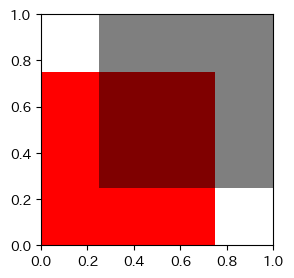

In [9]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(3, 3))
rect1 = patches.Rectangle(xy=(0, 0), width=0.75, height=0.75, fc="red")
rect2 = patches.Rectangle(xy=(0.25, 0.25), width=0.75, height=0.75, fc="black", alpha=0.5)
ax.add_artist(rect1)
ax.add_artist(rect2)

In [10]:
from tree import Mbtree_Anim

def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    self.selectednode = self.mbtree.nodelist[self.play.value]
    self.centernode = self.selectednode
    if self.selectednode.depth <= 4:
        maxdepth = self.selectednode.depth + 1
    elif self.selectednode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    self.mbtree.draw_subtree(centernode=self.centernode, selectednode=self.selectednode, ax=self.ax, maxdepth=maxdepth)
    for rect, node in self.mbtree.nodes_by_rect.items():
        if node.id > self.play.value:
            self.ax.add_artist(patches.Rectangle(xy=(rect.x, rect.y), width=rect.width,
                                                 height=rect.height, fc="black", alpha=0.5))

Mbtree_Anim.update_gui = update_gui

In [11]:
mbtree_anim = Mbtree_Anim(mbtree)

In [12]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    self.selectednode = self.mbtree.nodelist[self.play.value]
    self.centernode = self.selectednode
    if self.centernode.depth > 0:
        self.centernode = self.centernode.parent
    if self.centernode.depth <= 4:
        maxdepth = self.centernode.depth + 1
    elif self.centernode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    self.mbtree.draw_subtree(centernode=self.centernode, selectednode=self.selectednode, ax=self.ax, maxdepth=maxdepth)
    for rect, node in self.mbtree.nodes_by_rect.items():
        if node.id > self.play.value:
            self.ax.add_artist(patches.Rectangle(xy=(rect.x, rect.y), width=rect.width, height=rect.height, fc="black", alpha=0.5))

Mbtree_Anim.update_gui = update_gui

In [13]:
mbtree_anim = Mbtree_Anim(mbtree)

In [14]:
def update_gui(self):
    self.ax.clear()
    self.ax.set_xlim(-1, self.width - 1)
    self.ax.set_ylim(0, self.height)   
    self.ax.invert_yaxis()
    self.ax.axis("off")   
    
    self.selectednode = self.mbtree.nodelist[self.play.value]
    self.centernode = self.selectednode
    if self.centernode.depth > 0:
        self.centernode = self.centernode.parent
    while self.centernode.depth > 6:
        self.centernode = self.centernode.parent
    if self.centernode.depth <= 4:
        maxdepth = self.centernode.depth + 1
    elif self.centernode.depth == 5:
        maxdepth = 7
    else:
        maxdepth = 9
    self.mbtree.draw_subtree(centernode=self.centernode, selectednode=self.selectednode, ax=self.ax, maxdepth=maxdepth)
    for rect, node in self.mbtree.nodes_by_rect.items():
        if node.id > self.play.value:
            self.ax.add_artist(patches.Rectangle(xy=(rect.x, rect.y), width=rect.width, height=rect.height, fc="black", alpha=0.5))

Mbtree_Anim.update_gui = update_gui

In [15]:
mbtree_anim = Mbtree_Anim(mbtree)

In [16]:
import ipywidgets as widgets

def create_widgets(self):
    self.play = widgets.Play(max=self.mbtree.nodenum - 1, interval=500)
    self.frame_slider = widgets.IntSlider(max=self.mbtree.nodenum - 1, description="frame")
    self.interval_slider = widgets.IntSlider(value=500, min=1, max=2000, description="interval")
    widgets.jslink((self.play, "value"), (self.frame_slider, "value"))    
    widgets.jslink((self.play, "interval"), (self.interval_slider, "value"))

    with plt.ioff():
        self.fig = plt.figure(figsize=[self.width * self.size,
                                        self.height * self.size])
        self.ax = self.fig.add_axes([0, 0, 1, 1])
    self.fig.canvas.toolbar_visible = False
    self.fig.canvas.header_visible = False
    self.fig.canvas.footer_visible = False
    self.fig.canvas.resizable = False     
    
Mbtree_Anim.create_widgets = create_widgets

In [17]:
def display_widgets(self):
    hbox = widgets.HBox([self.play, self.frame_slider, self.interval_slider])
    display(widgets.VBox([hbox, self.fig.canvas]))
    
Mbtree_Anim.display_widgets = display_widgets

In [18]:
mbtree_anim = Mbtree_Anim(mbtree)

In [19]:
play = widgets.Play(interval=5)
display(play)

def on_play_changed(changed):
    print(play.value)

play.observe(on_play_changed, names="value")

Play(value=0, interval=5)

1
10
21
31
42
50
59
67
75
82
87
94
100


In [20]:
%%timeit 
mbtree.calc_node_height(maxdepth=1)

1.14 µs ± 3.07 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [21]:
%%timeit 
mbtree.calc_node_height(maxdepth=9)

212 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
def calc_node_height(self, centernode, maxdepth):
    nodelist = [centernode]
    depth = centernode.depth
    # 各深さのノードのリストを記録する変数を初期化する
    nodelist_by_depth = [None] * centernode.depth
    nodelist_by_depth.append(nodelist)
    
    # 深さ depth のノードのリストが空になるまで繰り返し処理を行う
    while len(nodelist) > 0:
        childnodelist = [] 
        for node in nodelist:
            childnodelist += node.children
        nodelist_by_depth.append(childnodelist)
        nodelist = childnodelist
        depth += 1
    
    for depth in range(maxdepth, centernode.depth - 1, -1):
        for node in nodelist_by_depth[depth]:
            if depth == maxdepth:
                node.height = 4
            else:
                node.calc_height()                  
                
Mbtree.calc_node_height = calc_node_height

In [23]:
%%timeit 
mbtree.calc_node_height(mbtree.nodelist_by_depth[6][0], maxdepth=9)

2.73 µs ± 12.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [24]:
def draw_subtree(self, centernode=None, selectednode=None, ax=None, size=0.25, lw=0.8, maxdepth=2):
    self.nodes_by_rect = {}

    if centernode is None:
        centernode = self.root
    self.calc_node_height(centernode=centernode, maxdepth=maxdepth)
    width = 5 * (maxdepth + 1)
    height = centernode.height
    parent = centernode.parent
    if parent is not None:
        height += (len(parent.children) - 1) * 4
        parent.height = height
    if ax is None:
        fig, ax = plt.subplots(figsize=(width * size, height * size))
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)   
        ax.invert_yaxis()
        ax.axis("off")        
    
    nodelist = [centernode]
    depth = centernode.depth
    while len(nodelist) > 0 and depth <= maxdepth:        
        dy = 0
        if parent is not None:
            dy = parent.children.index(centernode) * 4
        childnodelist = []
        for node in nodelist:
            if node is None:
                dy += 4
                childnodelist.append(None)
            else:
                dx = 5 * node.depth
                emphasize = node is selectednode
                rect = node.draw_node(ax=ax, maxdepth=maxdepth, emphasize=emphasize, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = node
                dy += node.height
                if len(node.children) > 0:  
                    childnodelist += node.children
                else:
                    childnodelist.append(None)
        depth += 1
        nodelist = childnodelist
        
    if parent is not None:
        dy = 0
        for sibling in parent.children:
            if sibling is not centernode:
                sibling.height = 4
                dx = 5 * sibling.depth
                rect = sibling.draw_node(ax, maxdepth=sibling.depth, size=size, lw=lw, dx=dx, dy=dy)
                self.nodes_by_rect[rect] = sibling
            dy += sibling.height
        dx = 5 * parent.depth
        rect = parent.draw_node(ax, maxdepth=maxdepth, size=size, lw=lw, dx=dx, dy=0)
        self.nodes_by_rect[rect] = parent
    
        node = parent
        while node.parent is not None:
            node = node.parent
            node.height = height
            dx = 5 * node.depth
            rect = node.draw_node(ax, maxdepth=node.depth, size=size, lw=lw, dx=dx, dy=0)
            self.nodes_by_rect[rect] = node
            
Mbtree.draw_subtree = draw_subtree

In [25]:
mbtree_anim = Mbtree_Anim(mbtree)